# Método de Euler para EDOs – Jupyter Notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Implementação do Método de Euler

In [28]:
def euler_com_tabela(f, x0, y0, h, n):
    print(f"{'ITER.':<6}{'x0':<10}{'y0':<15}{'f(x0,y0)':<15}{'|yn - yn-1|':<15}")
    print("-" * 60)

    x_vals = [x0]
    y_vals = [y0]

    # Iteração 0 (linha inicial sem erro)
    f_val = f(x0, y0)
    print(f"{0:<6}{x0:<10.4f}{y0:<15.4f}{f_val:<15.4f}{'-':<15}")

    for i in range(1, n + 1):
        y_new = y0 + h * f_val
        x_new = x0 + h
        f_val = f(x_new, y_new)
        erro = abs(y_new - y0)

        # Imprime linha da iteração atual
        print(f"{i:<6}{x_new:<10.4f}{y_new:<15.4f}{f_val:<15.4f}{erro:<15.4f}")

        # Atualiza variáveis para próxima iteração
        x0 = x_new
        y0 = y_new
        x_vals.append(x0)
        y_vals.append(y0)

    return np.array(x_vals), np.array(y_vals)


## Exemplo de uso: EDO y' = x + y

ITER. x0        y0             f(x0,y0)       |yn - yn-1|    
------------------------------------------------------------
0     0.0000    1.0000         0.0000         -              
1     0.0200    1.0000         0.0200         0.0000         
2     0.0400    1.0004         0.0401         0.0004         
3     0.0600    1.0012         0.0603         0.0008         
4     0.0800    1.0024         0.0807         0.0012         
5     0.1000    1.0040         0.1014         0.0016         
6     0.1200    1.0060         0.1225         0.0020         
7     0.1400    1.0085         0.1439         0.0024         
8     0.1600    1.0114         0.1659         0.0029         
9     0.1800    1.0147         0.1885         0.0033         
10    0.2000    1.0185         0.2117         0.0038         


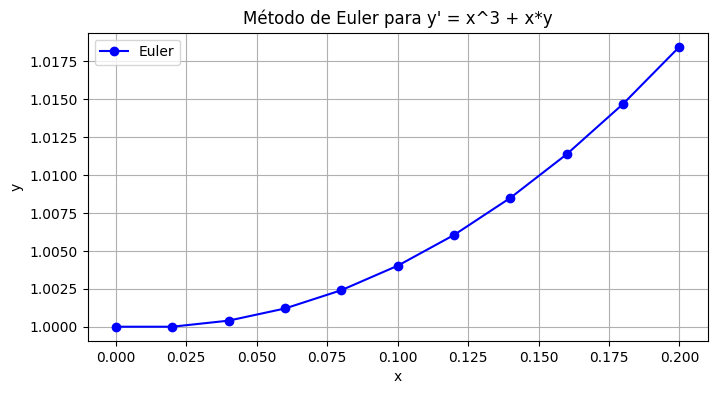

In [32]:
# Define a EDO: y' = x + y
f = lambda x, y: x**3 + x * y
x0 = 0
y0 = 1
h = 0.02
n = 10  # apenas 10 iterações para manter a tabela legível

x_vals, y_vals = euler_com_tabela(f, x0, y0, h, n)

# Plot opcional
plt.figure(figsize=(8, 4))
plt.plot(x_vals, y_vals, 'bo-', label='Euler')
plt.title("Método de Euler para y' = x^3 + x*y")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()

## Comparação com Solução Analítica

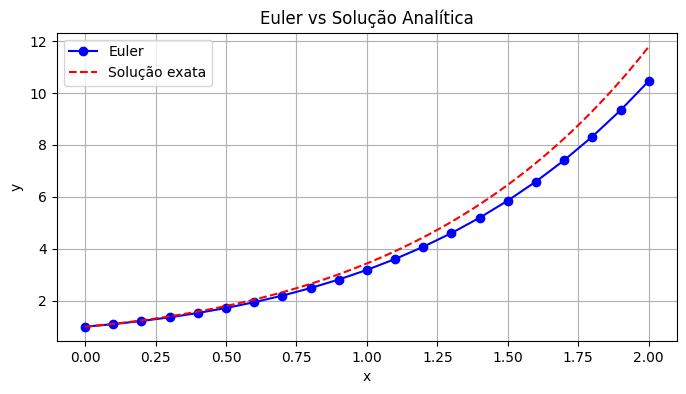

In [4]:
# Solução analítica: y = 2*e^x - x - 1
x_real = np.linspace(0, 2, 100)
y_real = 2 * np.exp(x_real) - x_real - 1

plt.figure(figsize=(8, 4))
plt.plot(x_vals, y_vals, 'bo-', label='Euler')
plt.plot(x_real, y_real, 'r--', label='Solução exata')
plt.title("Euler vs Solução Analítica")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()